In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
#with_mask = np.load('with_mask.npy')
#without_mask = np.load('without_mask.npy')


In [3]:
img2 = cv2.imread(r'D:\Me\UPES\Sem 2\MD hassan stuff\Hackathons\Self code\face.jpg')
img3 = cv2.imread(r'D:\Me\UPES\Sem 2\MD hassan stuff\Hackathons\Self code\dataset\without_mask\0.jpg')

In [4]:
haar_data = cv2.CascadeClassifier(r'D:\Me\UPES\Sem 2\MD hassan stuff\Hackathons\Self code\face_data.xml')

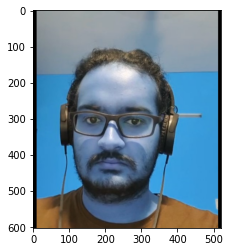

In [5]:
plt.imshow(img2)
plt.show()

In [6]:
haar_data.detectMultiScale(img2)
x = (x for x in range(1, 5))
list(x)

[1, 2, 3, 4]

62 187 317 317


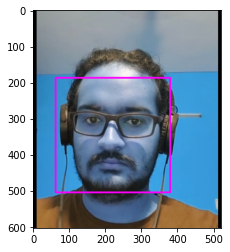

In [7]:
faces = haar_data.detectMultiScale(img2)
for x, y, w, h in faces:
    print(x, y, w, h)
    cv2.rectangle(img2, (x,y), (x+w, y+h), (255, 0, 255), 4)
plt.imshow(img2)
plt.show()

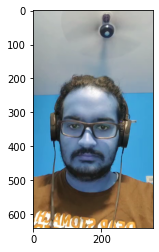

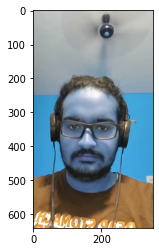

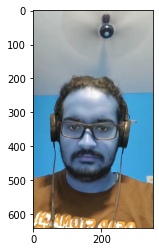

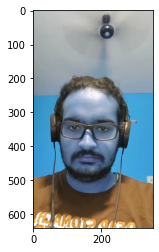

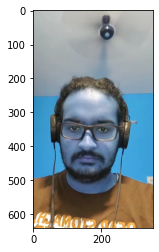

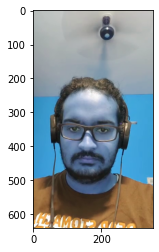

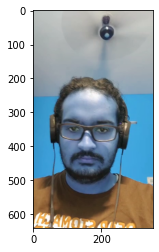

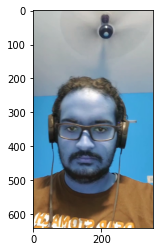

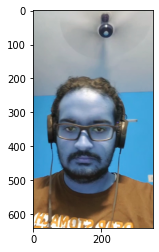

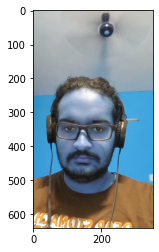

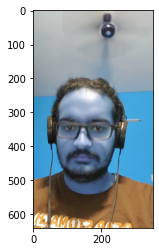

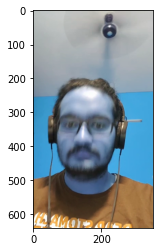

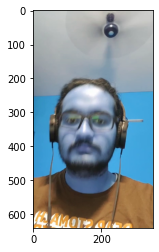

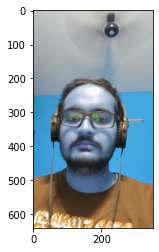

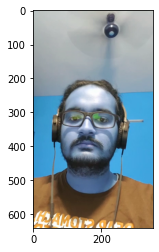

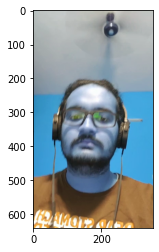

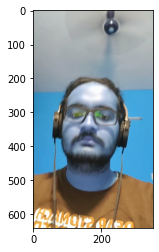

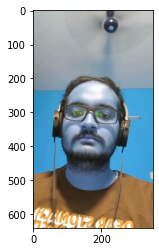

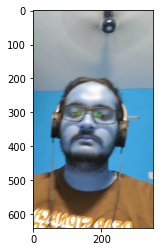

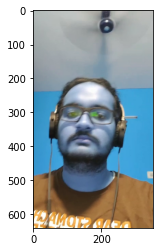

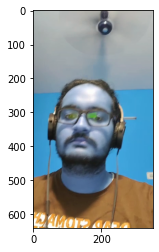

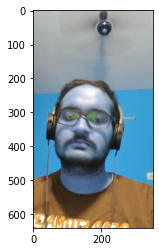

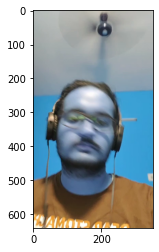

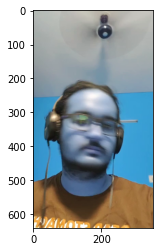

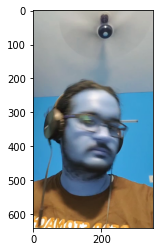

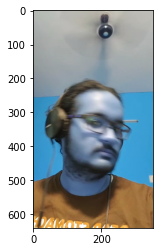

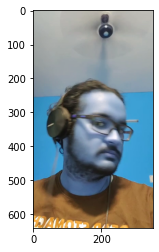

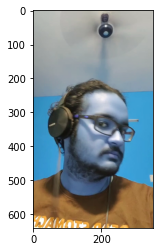

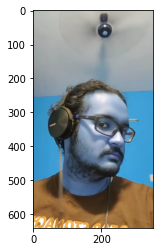

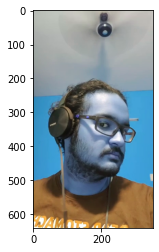

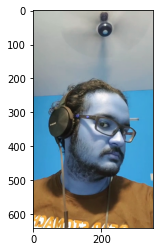

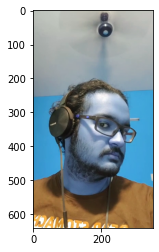

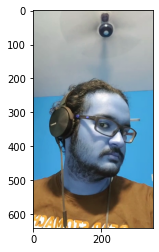

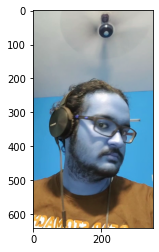

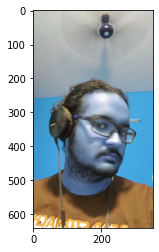

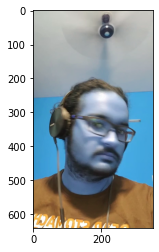

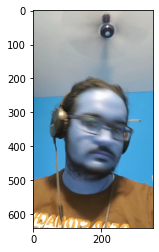

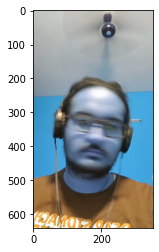

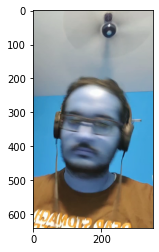

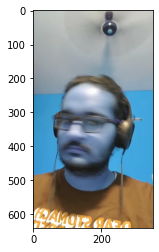

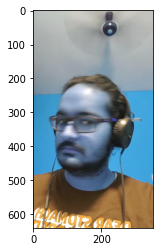

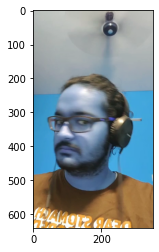

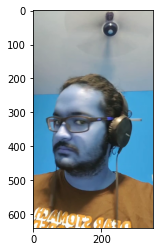

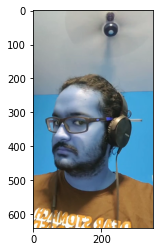

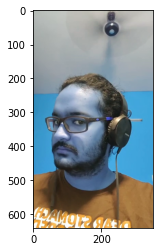

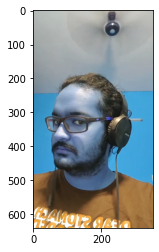

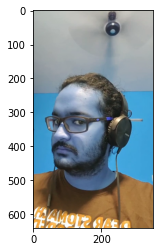

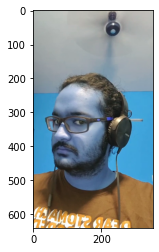

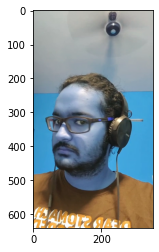

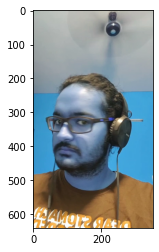

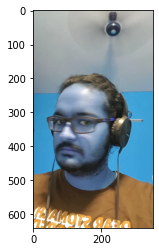

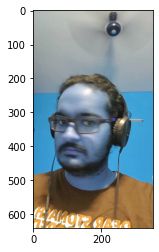

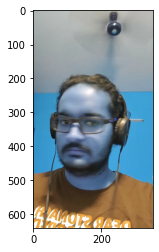

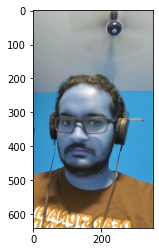

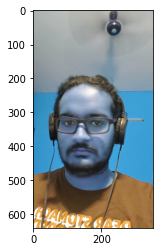

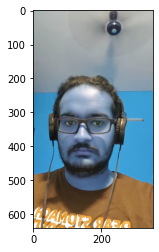

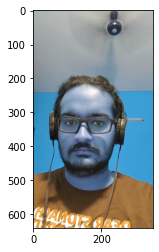

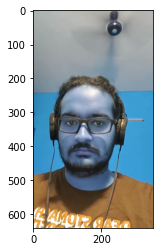

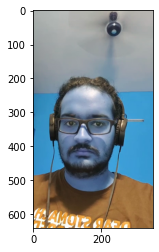

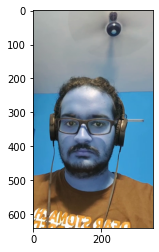

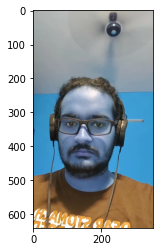

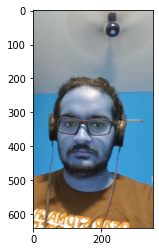

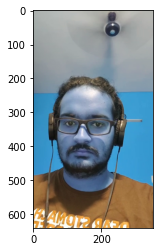

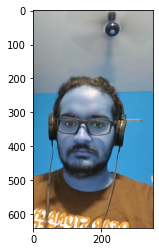

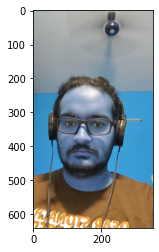

TypeError: Image data of dtype object cannot be converted to float

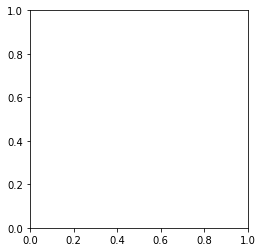

In [9]:
capture = cv2.VideoCapture(r'D:\Me\UPES\Sem 2\MD hassan stuff\Hackathons\Self code\Portrait.mp4')
count, data = 0, []
while True: 
    flag, img = capture.read()    #take 1 frame
    faces = haar_data.detectMultiScale(img)    #apply viola jones algo on the image to obtain face coords
    for x, y, w, h in faces:
        #cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 255), 4)    #add a rectangle to highlight the face 
        face = img[y:y+h, x:x+w, :]           #slice out the face through coords
        face = cv2.resize(face, (50, 50))   #resizing image for standardization
        data.append(face)                     #added face to a list for further processing
    plt.imshow(img)
    plt.show()
    count += 1 
    if count >= 100:
        break

In [9]:
print(len(data))

58


In [10]:
np.save('without_mask.npy', data)

In [11]:
#now to capture some data with a mask
capture = cv2.VideoCapture(r'D:\Me\UPES\Sem 2\MD hassan stuff\Hackathons\Self code\portrait_with_mask.mp4')
count, data2 = 0, []
while True: 
    flag, img = capture.read()                #take 1 frame
    faces = haar_data.detectMultiScale(img)   #apply viola jones algo on the image to obtain face coords
    for x, y, w, h in faces:
        #cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 255), 4)    #add a rectangle to highlight the face 
        face = img[y:y+h, x:x+w, :]           #slice out the face through coords
        face = cv2.resize(face, (50, 50))   #resizing image for standardization
        data2.append(face)                     #added face to a list for further processing
    #plt.imshow(img)
    #plt.show()
    count += 1 
    if count >= 100:
        break

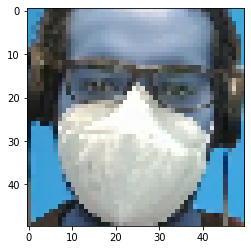

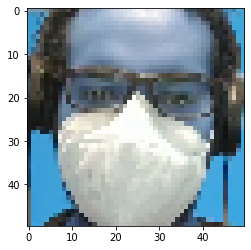

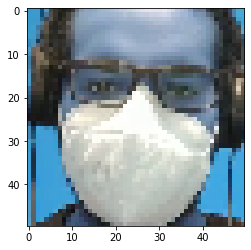

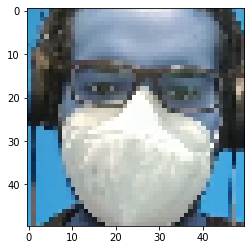

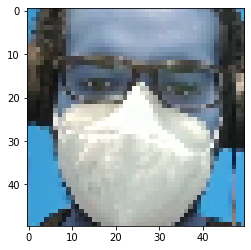

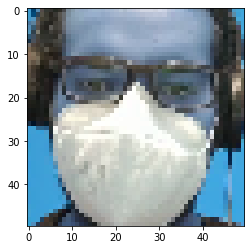

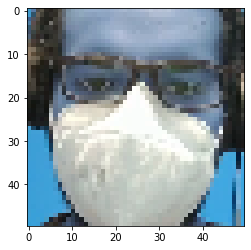

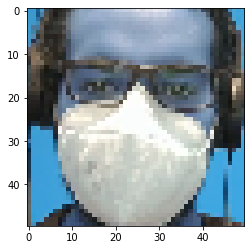

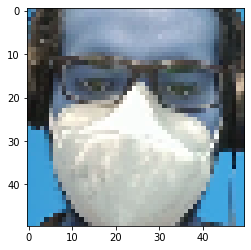

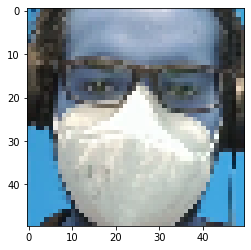

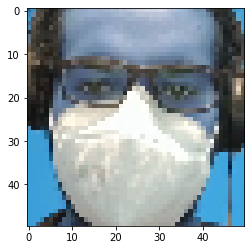

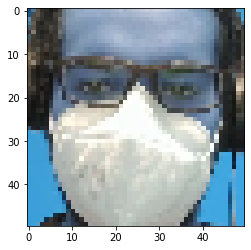

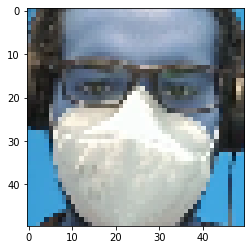

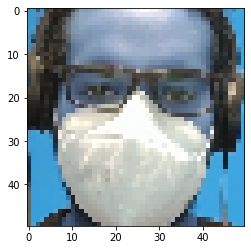

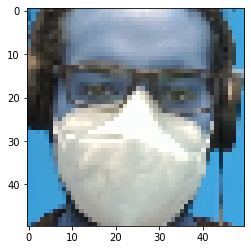

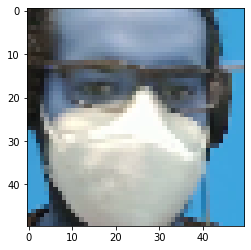

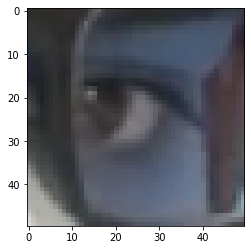

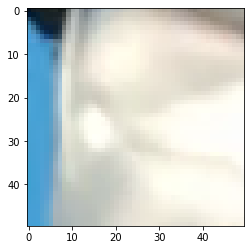

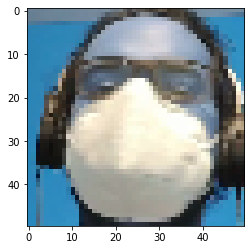

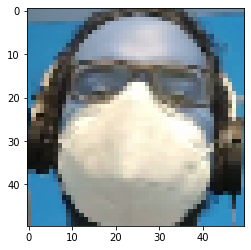

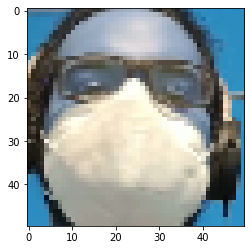

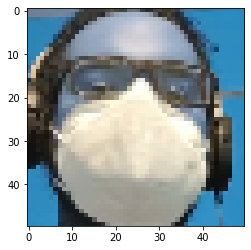

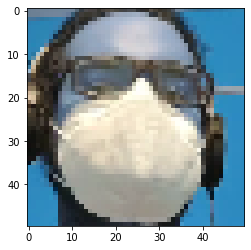

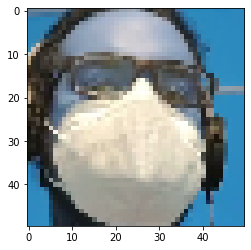

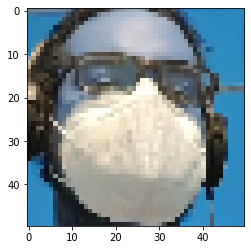

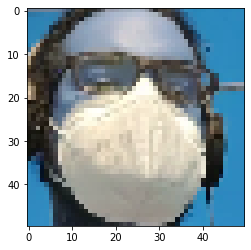

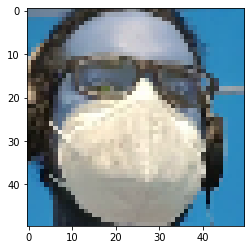

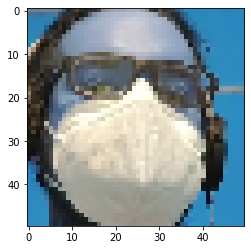

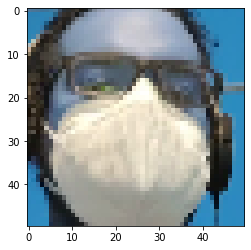

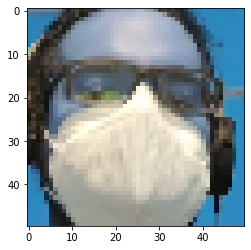

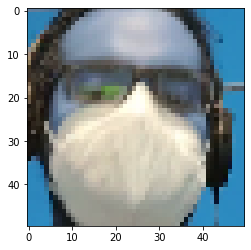

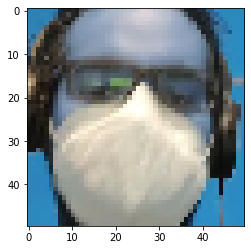

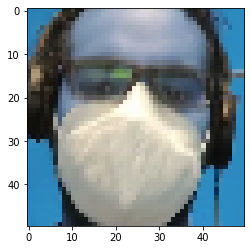

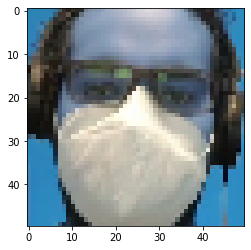

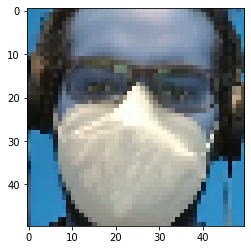

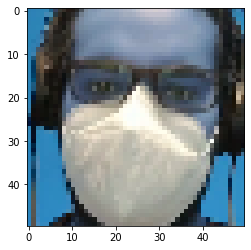

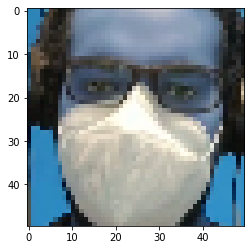

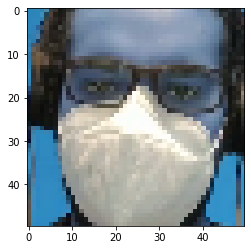

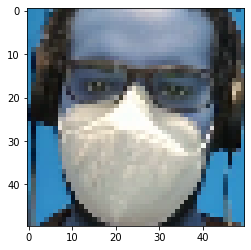

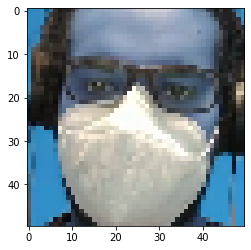

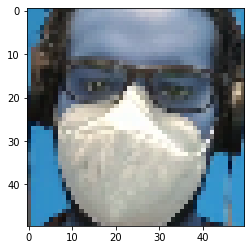

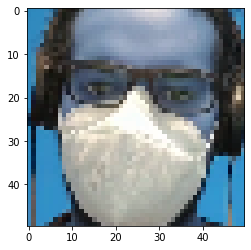

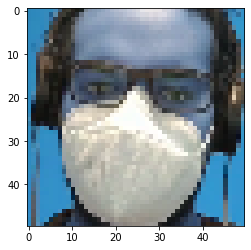

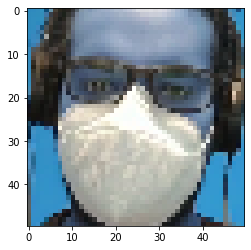

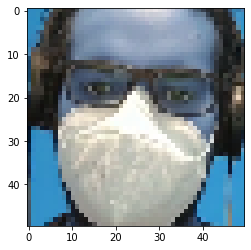

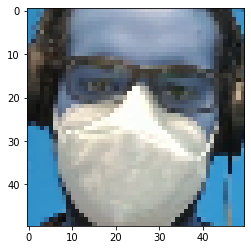

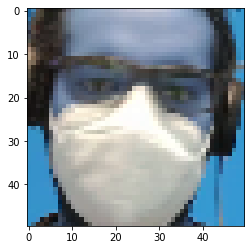

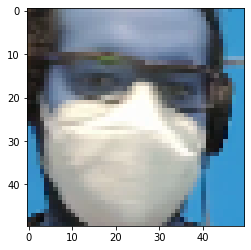

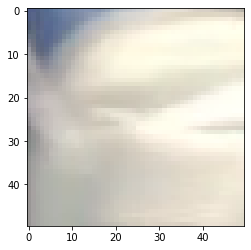

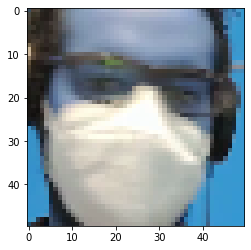

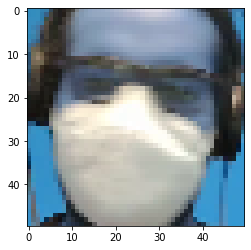

In [12]:
for face in data2:
    plt.imshow(face)
    plt.show()

In [13]:
np.save('with_mask.npy', data2)

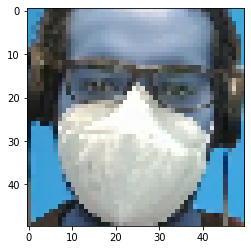

In [14]:
arr = np.load('with_mask.npy')
plt.imshow(arr[0])
plt.show()

# Now to make the AI

In [18]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [19]:
with_mask = np.load("with_mask.npy")
without_mask = np.load("without_mask.npy")

In [20]:
pass

In [21]:
without_mask[:51].shape

(51, 50, 50, 3)

In [22]:
with_mask = with_mask[:50].reshape(50, 50 * 50 * 3)
without_mask = without_mask[:50].reshape(50, 50 * 50 * 3)

In [23]:
with_mask.shape

(50, 7500)

In [24]:
without_mask.shape

(50, 7500)

In [25]:
X = np.r_[with_mask, without_mask] 

In [26]:
X.shape

(100, 7500)

In [27]:
labels = np.zeros(X.shape[0])
labels.shape

(100,)

In [28]:
labels[50:] = 1.0
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [29]:
names = {0: 'Mask', 1 : 'No Mask'}

In [30]:
#svm - Support Vector Machine
#SCV - support Vector Classification
from sklearn import svm
from sklearn.metrics import accuracy_score

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, labels, test_size = 0.25)

In [33]:
x_train.shape

(75, 7500)

In [34]:
#dimensionality reduction
#Principal Component Analysis
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=3)
x_train = pca.fit_transform(x_train)

In [36]:
x_train[0]

array([ 2179.83440095,  1921.18212195, -1276.41247738])

In [37]:
x_train.shape

(75, 3)

In [38]:
svm = svm.SVC()     #this step seems to not work
svm.fit(x_train, y_train)

SVC()

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, labels, test_size = 0.25)

In [40]:
x_train.shape   #75% will be used for training

(75, 7500)

In [41]:
x_test = pca.transform(x_test)
y_pred = svm.predict(x_test)

In [42]:
accuracy_score(y_test, y_pred)

1.0

In [43]:
haar_data = cv2.CascadeClassifier(r'D:\Me\UPES\Sem 2\MD hassan stuff\Hackathons\Self code\face_data.xml')
capture = cv2.VideoCapture(r'D:\Me\UPES\Sem 2\MD hassan stuff\Hackathons\Self code\portrait_with_mask.mp4') 
data = [] 
font = cv2.FONT_HERSHEY_COMPLEX 
while True: 
    flag, img = capture.read() 
    if flag: 
        faces = haar_data.detectMultiScale(img) 
        for x,y,w,h in faces: 
            cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,255), 4) 
            face = img[y:y+h, x:x+w, :] 
            face = cv2.resize(face, (50, 50)) 
            face = face.reshape(1,-1) 
            pred = svm.predict(face)[0] 
            n = names[int(pred)] 
            cv2.putText(img, n, (x,y), font, 1, (244,250,250), 2) 
            print(n) 
        #plt.imshow(img)
        #plt.show()
        cv2.imshow('result',img) 
        #27 - ASCII of Escape 
        if cv2.waitKey(2) == 27: 
            break 

capture.release() 
cv2.destroyAllWindows() 


ValueError: X has 7500 features, but SVC is expecting 3 features as input.